## Data Preprocessing

#### Transfomring Grid Weather Information Into Numpy File of size (21,31,5)
The numpy files saved are named as **grid_map[yyyy-mm-dd hh.mm.ss].npy** in a folder named by **'grid_data'**.<br/>

**grid** = **np.load('grid_data//grid_map[2018-04-21 10.00.00].npy')**<br/>
**grid[ : , : , 0 ]** = **Temperature Map of 651 stations**<br/>
**grid[ : , : , 1 ]** = **Pressure Map of 651 stations**<br/>
**grid[ : , : , 2 ]** = **Humidity of 651 stations**<br/>
**grid[ : , : , 3 ]** = **Wind Direction of 651 stations**<br/>
**grid[ : , : , 4 ]** = **Wind Speed of 651 stations**<br/>

In [ ]:
import pandas as pd
from datetime import datetime , timedelta
import csv
import numpy as np
from numpy import linalg as LA
import os

#Selecting the file for converting into numpy
#df_grid = pd.read_csv('gridWeather_201804.csv')
#df_grid = pd.read_csv('gridWeather_201701-201803.csv')
df_grid = pd.read_csv('gridWeather_20180501-20180502.csv')

df_grid.replace({'weather':{
    "CLEAR_DAY" : 1,
    "CLEAR_NIGHT" : 2,
    "RAIN" : 3,
    "WIND" : 4,
    "SNOW" : 5,
    "PARTLY_CLOUDY_DAY" : 6,
    "PARTLY_CLOUDY_NIGHT" : 7,
    "CLOUDY" : 8,
    "HAZE" : 9,
}}, inplace=True)

datetime_str_start = '2018-05-01 00:00:00'
datetime_str_end = '2018-05-02 23:00:00'

dt_start = datetime.strptime(datetime_str_start, "%Y-%m-%d %H:%M:%S")
dt_end = datetime.strptime(datetime_str_end, "%Y-%m-%d %H:%M:%S")

time_length = int((dt_end - dt_start)/timedelta(hours = 1))

for i in range(time_length + 1):
    dt_pred = dt_start + timedelta(hours = i)
    df_temp = df_grid[(df_grid['time'] == dt_pred.strftime("%Y-%m-%d %H:%M:%S"))]

    #weather_map = np.zeros((21,31))
    temperature_map = np.zeros((21,31))
    pressure_map = np.zeros((21,31))
    humd_map = np.zeros((21,31))
    wind_dir_map = np.zeros((21,31))
    wind_speed_map = np.zeros((21,31))

    Total_map = np.zeros((21,31,5))

    storing_path = "C:/Users/Juliana/Desktop/msbd5002project_group6/grid_data/"
    if not os.path.exists(storing_path):
        os.makedirs(storing_path)

    j = -1
    for k in range(651):
        if k%21 == 0:
            j += 1
            #weather_map[20 - k%21][j] = df_grid['weather'].iloc[k]
            temperature_map[20 - k%21][j] = df_grid['temperature'].iloc[k]
            pressure_map[20 - k%21][j] = df_grid['pressure'].iloc[k]
            humd_map[20 - k%21][j] = df_grid['humidity'].iloc[k]
            wind_dir_map[20 - k%21][j] = df_grid['wind_direction'].iloc[k]
            wind_speed_map[20 - k%21][j] = df_grid['wind_speed'].iloc[k]
        else:
            #weather_map[20 - k%21][j] = df_grid['weather'].iloc[k]
            temperature_map[20 - k%21][j] = df_grid['temperature'].iloc[k]
            pressure_map[20 - k%21][j] = df_grid['pressure'].iloc[k]
            humd_map[20 - k%21][j] = df_grid['humidity'].iloc[k]
            wind_dir_map[20 - k%21][j] = df_grid['wind_direction'].iloc[k]
            wind_speed_map[20 - k%21][j] = df_grid['wind_speed'].iloc[k]
        
    #Total_map[:,:,0] = weather_map
    Total_map[:,:,0] = temperature_map
    Total_map[:,:,1] = pressure_map
    Total_map[:,:,2] = humd_map
    Total_map[:,:,3] = wind_dir_map
    Total_map[:,:,4] = wind_speed_map
    
    dt_str = dt_pred.strftime('%Y-%m-%d %H.%M.%S')
    
    np.save(storing_path + 'grid_map[' + dt_str + '].npy',Total_map)


([], <a list of 0 Text yticklabel objects>)

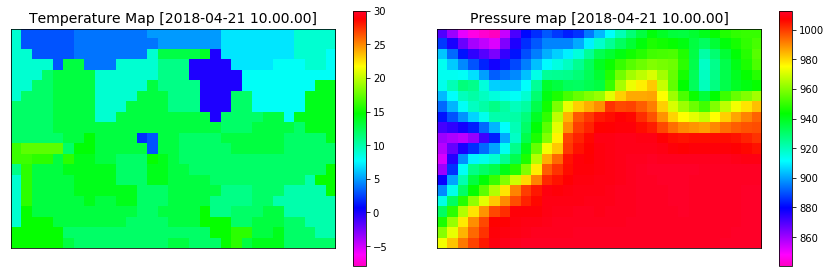

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import numpy as np

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(14,20))

sample = np.load('grid_data//grid_map[2018-04-21 10.00.00].npy')

plt.subplot(gs[0,0])
plt.title('Temperature Map [2018-04-21 10.00.00]', fontsize = '14')
im = plt.imshow(sample[:,:,0],cmap=plt.get_cmap('gist_rainbow_r'))
plt.clim(-8,30)
plt.colorbar(im, fraction=0.036, pad=0.05)
plt.xticks([])
plt.yticks([])

plt.subplot(gs[0,1])
plt.title('Pressure map [2018-04-21 10.00.00]', fontsize = '14')
im = plt.imshow(sample[:,:,1],cmap=plt.get_cmap('gist_rainbow_r'))
#plt.clim(-8,30)
plt.colorbar(im, fraction=0.036, pad=0.05)
plt.xticks([])
plt.yticks([])

### Clustering of Air Station

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

df_air_info = pd.read_csv('Air_Station_ID.csv')
X = df_air_info[['long','lat']].values

#cluster = DBSCAN(eps=0.24, min_samples=2).fit(X)
cluster_result = []
for n in range(2,10):
    score = 0
    for k in range(10):
        cluster = KMeans(n_clusters=n, random_state=k).fit(X)
        cluster_label = cluster.labels_
        score += metrics.silhouette_score(X, cluster_label, metric='euclidean')/10
    print("No.of clusters : %s"  %n + " , silhouette_score : %.3f" %score)
    cluster_result.append(score)
    
#Optimal No. of cluster = 6
cluster = KMeans(n_clusters=6, random_state=10).fit(X)
cluster_label = cluster.labels_
clusters = []
for i in set(cluster_label):
    temp = [x[0] for j,x in enumerate(df_air_info.values) if cluster_label[j] == i]
    clusters.append(temp)

### Saving the air station data into numpy file for each time stemp similar to the grid data
The numpy files saved are named as **air_map[yyyy-mm-dd hh.mm.ss].npy** in a folder named by **'air_data'**.<br/>
The numpy files are all with the shape **(3,35)**.<br/><br/>
**air** = **np.load('air_data//air_map[2018-04-21 10.00.00].npy')**<br/>
**air[ 0 , : ]** = **PM2.5 values of 35 stations**<br/>
**air[ 1 , : ]** = **PM10 values of 35 stations**<br/>
**air[ 2 , : ]** = **O3 values of 35 stations**


In [ ]:
import pandas as pd
from datetime import datetime , timedelta
import csv
import numpy as np
from numpy import linalg as LA
import os
import math

#Here Specific the file going to transform
#df_air = pd.read_csv('airQuality_201701-201801.csv')
#df_air = pd.read_csv('airQuality_201802-201803.csv')
df_air = pd.read_csv('aiqQuality_201804.csv')

#Change the time string with respect to the converting date in the file
datetime_str_start = '2018-04-01 02:00:00'
datetime_str_end = '2018-04-30 23:00:00'

dt_start = datetime.strptime(datetime_str_start, "%Y-%m-%d %H:%M:%S")
dt_end = datetime.strptime(datetime_str_end, "%Y-%m-%d %H:%M:%S")

time_length = int((dt_end - dt_start)/timedelta(hours = 1))

for i in range(time_length + 1):
    dt_pred = dt_start + timedelta(hours = i)
    df_temp = df_air[(df_air['time'] == dt_pred.strftime("%Y-%m-%d %H:%M:%S"))]
    #fillna by their corresponding cluster
    for k,cluster_list in enumerate(clusters):
        df_temp_cluster = df_temp[df_temp['station_id'].isin(cluster_list)]
        PM25_mean = df_temp_cluster['PM25_Concentration'].mean()
        PM10_mean = df_temp_cluster['PM10_Concentration'].mean()
        O3_mean = df_temp_cluster['O3_Concentration'].mean()
        #Error Detection for NaN value
        if math.isnan(PM25_mean) == False:
            df_temp_cluster['PM25_Concentration'] = df_temp_cluster['PM25_Concentration'].fillna(int(PM25_mean))
        if math.isnan(PM10_mean) == False:
            df_temp_cluster['PM10_Concentration'] = df_temp_cluster['PM10_Concentration'].fillna(int(PM10_mean))
        if math.isnan(O3_mean) == False:
            df_temp_cluster['O3_Concentration'] = df_temp_cluster['O3_Concentration'].fillna(int(O3_mean))
        
        if k == 0:
            df_temp_fill = df_temp_cluster
        else:
            df_temp_fill = df_temp_fill.append(df_temp_cluster)
            
    PM25_mean = df_temp_fill['PM25_Concentration'].mean()
    PM10_mean = df_temp_fill['PM10_Concentration'].mean()
    O3_mean = df_temp_fill['O3_Concentration'].mean()
    #Error Detection for NaN value
    if math.isnan(PM25_mean) == False:
        df_temp_fill['PM25_Concentration'] = df_temp_fill['PM25_Concentration'].fillna(int(PM25_mean))
    if math.isnan(PM10_mean) == False:
        df_temp_fill['PM10_Concentration'] = df_temp_fill['PM10_Concentration'].fillna(int(PM10_mean))
    if math.isnan(O3_mean) == False:
        df_temp_fill['O3_Concentration'] = df_temp_fill['O3_Concentration'].fillna(int(O3_mean))
    
    if i == 0:
        df_air_temp = df_temp_fill
    else:
        df_air_temp = df_air_temp.append(df_temp_fill)
        
print('Start Generating Numpy')

df_air_temp = df_air_temp.sort_values(by=['station_id'])
df_air_temp = df_air_temp.sort_values(by=['time'])
df_air_temp = df_air_temp.fillna(method = 'ffill')
df_air_temp = df_air_temp.fillna(method = 'bfill')
del df_temp_fill
del df_temp_cluster

for i in range(time_length + 1):
    dt_pred = dt_start + timedelta(hours = i)
    df_temp = df_air_temp[(df_air_temp['time'] == dt_pred.strftime("%Y-%m-%d %H:%M:%S"))]
    df_temp = df_temp.sort_values(by=['station_id'])

    storing_path = "C:/Users/Juliana/Desktop/msbd5002project_group6/air_data/"
    if not os.path.exists(storing_path):
        os.makedirs(storing_path)
    
    Total_mat = np.zeros((3,35))
    if df_temp['station_id'].count() == 35:
        for i in range(35):
            Total_mat[0][i] = df_temp['PM25_Concentration'].iloc[i]
            Total_mat[1][i] = df_temp['PM10_Concentration'].iloc[i]
            Total_mat[2][i] = df_temp['O3_Concentration'].iloc[i]
        
        dt_str = dt_pred.strftime('%Y-%m-%d %H.%M.%S')
        np.save(storing_path + 'air_map[' + dt_str + '].npy',Total_mat)
    else:
        dt_str = dt_pred.strftime('%Y-%m-%d %H.%M.%S')
        #print('Missing Data: ' + dt_str)

            